In [1]:
target_names = ['setosa', 'versicolor', 'virginica']
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_data():
    data = np.loadtxt('iris.csv', delimiter=',', skiprows=1)
    return data

In [4]:
# 加载数据，获取前100个样本，前2个标签
data = load_data()
X = data[:, 0:4]
Y = data[:, 4]
# 把y变为onehot编码
Y = list(map(int, Y))
onehot_Y = np.eye(3)[Y]

In [5]:
class Softmax_Regression:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.w = None
        self.Loss = []
        self.Accueracy = []

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z ,axis=1, keepdims=True))
        return exp_z / np.sum(exp_z,axis=1, keepdims=True)
    
    def cross_entropy(self):
       y_hat = self.softmax(self.x @ self.w)
       loss = -np.sum(self.y * np.log(y_hat))
       loss = loss / self.x.shape[0]
       wd = self.x.T @ (y_hat - self.y)
       return loss, wd
    
    def train(self, learn_rate=0.0001, epochs=1000):
        self.w = np.random.randn(4, 3)
        for i in range(epochs):
            loss, wd = self.cross_entropy()
            self.Loss.append(loss)
            acc = self.compute_accuracy()
            self.Accueracy.append(acc)
            self.w -= learn_rate * wd
            if i in [0, 1, 10, 100, 500, 999]:
                print('epoch %d, loss %f, accuracy %f' % (i, loss, acc))
                
    def predict(self, x):
        return np.argmax(self.softmax(x @ self.w))
    
    def compute_accuracy(self):
        return list(map(lambda x, y: self.predict([x]) == y, X, Y)).count(True) / len(X) * 100


In [6]:
softmax = Softmax_Regression(X, onehot_Y)
softmax.train()

epoch 0, loss 10.835110, accuracy 33.333333
epoch 1, loss 10.343145, accuracy 33.333333
epoch 10, loss 5.916049, accuracy 33.333333
epoch 100, loss 0.681416, accuracy 47.333333
epoch 500, loss 0.424226, accuracy 79.333333
epoch 999, loss 0.304763, accuracy 92.666667


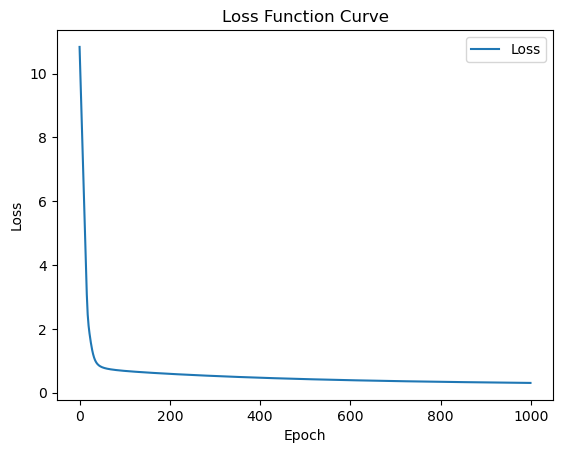

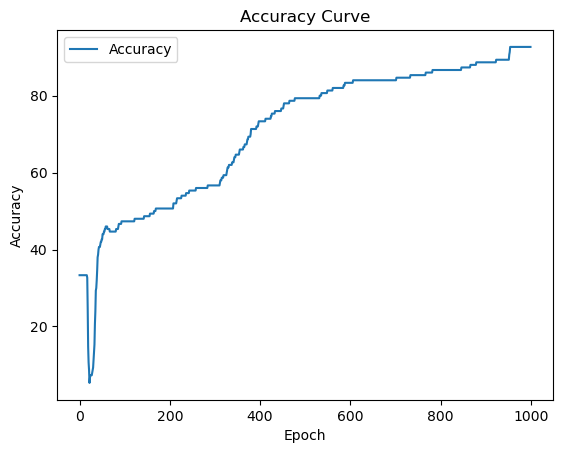

In [7]:
plt.title('Loss Function Curve')  
plt.xlabel('Epoch')  
plt.ylabel('Loss') 
plt.plot(softmax.Loss, label="Loss")  
plt.legend()  
plt.show() 

plt.title('Accuracy Curve')  
plt.xlabel('Epoch')  
plt.ylabel('Accuracy') 
plt.plot(softmax.Accueracy, label="Accuracy")  
plt.legend()  
plt.show()